In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport
from pylab import *

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import sem
from numpy.random import seed

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

#figure(figsize=(1,1))

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()
    
    

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

In [5]:
df = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False, index_col=None)

In [6]:
cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE', 'ACTU-INST', 'ACTU-IRCV',
        'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D', 'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H', 'ALL-L30D',
        'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D',
        'GLDR-PIC', 'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC',
        'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV', 'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOTL',
        'NGHT-INSTRUCT', 'NGHT-IRCV', 'NGHT-L24H', 'NGHT-L30D', 'NGHT-L90D', 'NGHT-PIC', 'NGHT-TOTL', 'SENG-INSTRUCT',
        'SENG-IRCV', 'SENG-L24H', 'SENG-L30D', 'SENG-L90D', 'SENG-PIC', 'SENG-TOTL', 'SIMU-TOTL']

In [7]:
def filler(col):
    df[col] = df[col].fillna(0)
    
for c in cols:
    filler(c)

In [8]:
int_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE']

In [9]:
def integer(col):
    df[col] = df[col].astype(int)

In [10]:
integer(int_cols)

In [11]:
#generate_profile(df)

In [12]:
df.head(3)

,idx,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


In [13]:
df.drop('idx', axis=1, inplace=True)

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


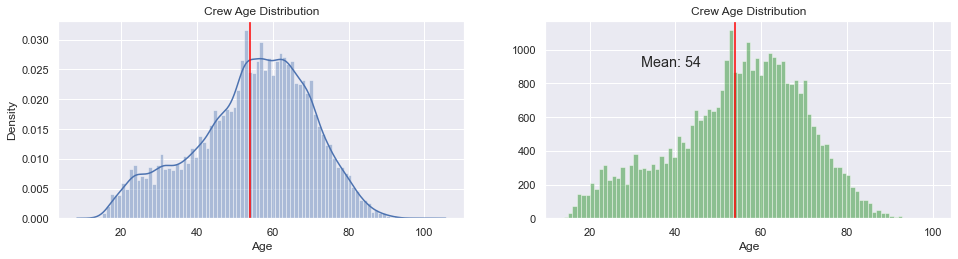

In [14]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')

subplot(2,2,2)
ax = sns.distplot(df.crew_age, bins=85, kde=False, color='green', axlabel='Age')
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')
plt.text(32,900, 'Mean: ' + str(age_u), size='large')

plt.show()


In [15]:
df.crew_age.describe()

count    34900.000000
mean        54.635215
std         15.229651
min         14.000000
25%         45.000000
50%         56.000000
75%         66.000000
max        100.000000
Name: crew_age, dtype: float64

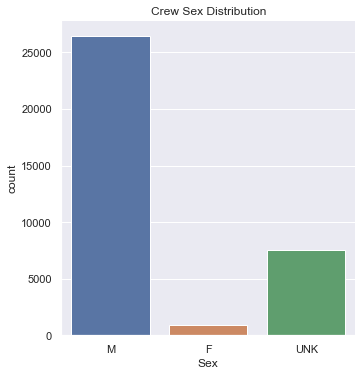

In [16]:
sns.catplot(x="crew_sex", kind="count",  data=df)
plt.title('Crew Sex Distribution')
plt.xlabel("Sex")
plt.show()

In [17]:
df.crew_sex.value_counts()

M      26478
UNK     7503
F        919
Name: crew_sex, dtype: int64

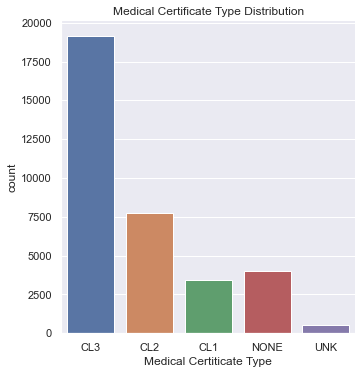

In [18]:
sns.catplot(x="med_certf", kind="count",  data=df)
plt.title('Medical Certificate Type Distribution')
plt.xlabel("Medical Certiticate Type")
plt.show()

In [19]:
df.med_certf.value_counts()

CL3     19146
CL2      7758
NONE     4029
CL1      3440
UNK       527
Name: med_certf, dtype: int64

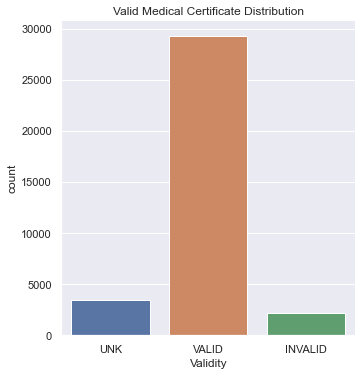

In [20]:
sns.catplot(x="med_crtf_vldty", kind="count",  data=df)
plt.title('Valid Medical Certificate Distribution')
plt.xlabel("Validity")
plt.show()

In [21]:
df.med_crtf_vldty.value_counts()

VALID      29308
UNK         3431
INVALID     2161
Name: med_crtf_vldty, dtype: int64

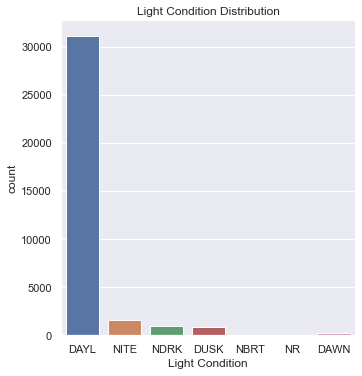

In [22]:
sns.catplot(x="light_cond", kind="count",  data=df)
plt.title('Light Condition Distribution')
plt.xlabel("Light Condition")
plt.show()

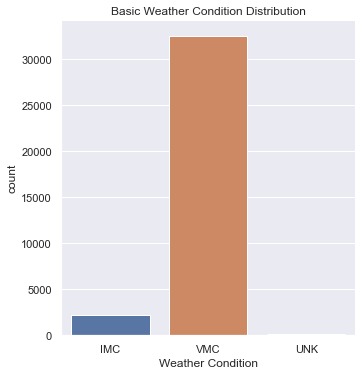

In [23]:
sns.catplot(x="wx_cond_basic", kind="count",  data=df)
plt.title('Basic Weather Condition Distribution')
plt.xlabel("Weather Condition")
plt.show()

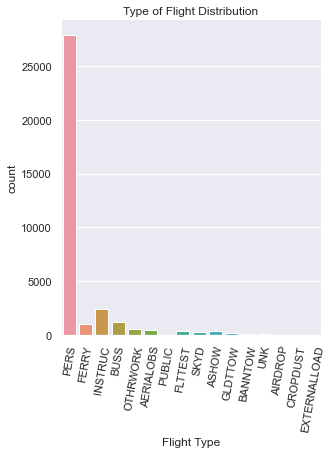

In [24]:
chart = sns.catplot(x="type_fly", kind="count",  data=df)
chart.set_xticklabels(rotation=80)
plt.title('Type of Flight Distribution')
plt.xlabel("Flight Type")
plt.show()

In [25]:
df.type_fly.value_counts()

PERS            27835
INSTRUC          2392
BUSS             1182
FERRY            1032
OTHRWORK          525
AERIALOBS         502
FLTTEST           391
ASHOW             334
SKYD              245
GLDTTOW           178
BANNTOW           134
UNK                54
PUBLIC             44
CROPDUST           21
AIRDROP            14
EXTERNALLOAD       12
Name: type_fly, dtype: int64

## Pilot Certificate Analysis

In [26]:
pilot_cert_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE']

pilot_cert = df[pilot_cert_cols]
pilot_cert.sample(5)

,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE
18875,0,0,0,0,0,0,1,0,0,0
7114,1,0,1,0,0,0,0,0,0,0
13231,0,0,0,0,0,0,1,0,0,0
34318,0,0,0,1,0,0,0,0,0,0
22770,0,0,0,0,0,0,1,0,0,0


In [27]:
pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(pilot_cert['result'] > 1))
print('over 2', sum(pilot_cert['result'] >= 2))
print('over 3', sum(pilot_cert['result'] >= 3))
print('over 4', sum(pilot_cert['result'] >= 4))


over 1 3121
over 2 3121
over 3 200
over 4 5


<ipython-input-27-6dc0af63c239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']


There appears to be some conflicting entries a number of this certificates cannot be held at the same time as one is a higher level that replaces the next lower certificate.

TASK: Run code to retain only the highest certificate level

In [28]:
ATP = df.columns.get_loc('CERT_ATP')
COMM = df.columns.get_loc('CERT_COMM')
PRI = df.columns.get_loc('CERT_PRI')
REC = df.columns.get_loc('CERT_REC')
SPRT = df.columns.get_loc('CERT_SPRT')
STU = df.columns.get_loc('CERT_STU')
NONE = df.columns.get_loc('CERT_NONE')

In [29]:
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, COMM] = 0
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif ((df.iloc[i, REC] == 1) | (df.iloc[i, SPRT] == 1)):
        df.iloc[i, STU] = 0
        
    if (df.iloc[i, ATP] == 0) & (df.iloc[i, COMM] == 0)  &  (df.iloc[i, PRI] == 0) & (df.iloc[i, REC] == 0) & (df.iloc[i, SPRT] == 0) & (df.iloc[i, STU] == 0):
        df.iloc[i, NONE] = 1
        

In [30]:
df["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(df['result'] > 1))
print('over 2', sum(df['result'] >= 2))
print('over 3', sum(df['result'] >= 3))
print('over 4', sum(df['result'] >= 4))

over 1 12
over 2 12
over 3 0
over 4 0


The 12 record with double entries are acceptable as these are sport and recreational certificates.

### TASK - CREATE PILOT CERTIFICATION FEATURE

In [31]:
#use colum indexes previously generated

df['pilot_privileges'] = ""

priv = df.columns.get_loc('pilot_privileges')
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, priv] = 'ATP'
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, priv] = 'COMMERCIAL'
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, priv] = 'PRIVATE'
    elif df.iloc[i, REC] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, SPRT] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, STU] == 1:
        df.iloc[i, priv] = 'STUDENT'
    elif df.iloc[i, NONE] == 1:
        df.iloc[i, priv] = 'NONE'

In [32]:
print(df.columns)

Index(['event_cause', 'far_part', 'crew_category', 'crew_age', 'crew_sex',
       'med_certf', 'med_crtf_vldty', 'light_cond', 'wx_cond_basic',
       'type_fly', 'CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM',
       'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT',
       'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE',
       'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI', 'INSTRUCT_IAIR',
       'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE',
       'ACTU-INST', 'ACTU-IRCV', 'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D',
       'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H',
       'ALL-L30D', 'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT',
       'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC',
       'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D',
       'MAKE-L90D', 'MAKE-PIC', 'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV',
       'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOT

In [33]:
to_drop = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT','CERT_NONE', 'result',
          'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC','GLDR-TOTL',]
df.drop(to_drop, axis=1, inplace=True)

In [34]:
popped = df.pop('pilot_privileges')
df.insert(10, 'pilot_privileges', popped)

In [35]:
df.head()

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


#### Check airplane certs for consistency

In [36]:
ap = df.loc[:,'AP_MEL':'AP_NONE']
ap['result'] = ap['AP_MEL'] + ap['AP_MES'] + ap['AP_SEL'] + ap['AP_SES']


In [37]:
fix = ap[(ap['AP_NONE'] == 1) & (ap['result'] >= 1)]

In [38]:
fix.shape

(0, 6)

Airplane certifications appear consistent.

#### Check Instructor Certification for consistency

In [39]:
Inst = df.loc[:,'INSTRUCT_AME':'INSTRUCT_NONE']
Inst['result'] = Inst['INSTRUCT_AME'] + Inst['INSTRUCT_ASE'] + Inst['INSTRUCT_GLI'] + Inst['INSTRUCT_IAIR'] + Inst['INSTRUCT_SPRT']

In [40]:
fix = Inst[(Inst['INSTRUCT_NONE'] == 1) & (Inst['result'] >= 1)]

In [41]:
fix.shape

(0, 7)

Instructor Certifications appear consisitent

#### Check Intrument Rating for Consistency

In [42]:
I = Inst = df.loc[:,'INSTRUM_APLN':'INSTRUM_NONE']

In [43]:
fix = I[(I['INSTRUM_APLN'] == 1) & (I['INSTRUM_NONE'] == 1)]
fix.shape

(0, 2)

Instrument Certifications appear consisitent

#### IMPUTE TOTAL FLIGHT TIME WITH MAKE FLT TIME IF  MAKE FLT TIME IS LARGER

In [44]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(247, 69)

In [45]:
make_idx = df.columns.get_loc('MAKE-TOTL')
all_idx = df.columns.get_loc('ALL-TOTL')

for i in range(len(df)):
    if df.iloc[i, make_idx] > df.iloc[i, all_idx]:
        df.iloc[i, all_idx] = df.iloc[i, make_idx]

In [46]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(0, 69)

In [47]:
df.shape

(34900, 69)

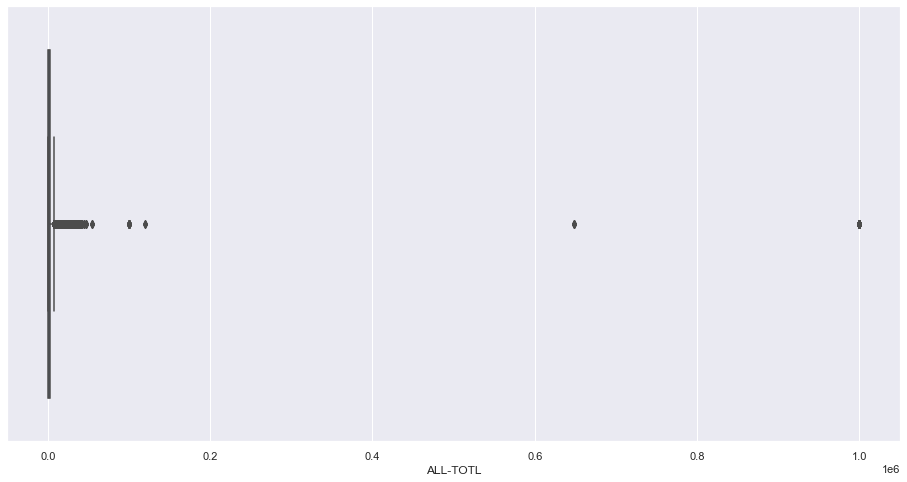

In [48]:
sns.boxplot(x=df['ALL-TOTL'])
plt.show()

#### Remove Outliers on the High end of Total Flight Time

In [49]:
Q1 = df['ALL-TOTL'].quantile(0.25)
Q3 = df['ALL-TOTL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~(df['ALL-TOTL'] > (Q3 + 1.5 * IQR))]
df.shape

2749.5


(30774, 69)

#### Check for Privideges minimum Hours and impute minimums if not met

### ATP

In [50]:
low_atp = df[(df['pilot_privileges'] == 'ATP') & (df['ALL-TOTL'] < 1500)]
low_atp.shape

(107, 69)

In [51]:
def impute_time(priv, ALL, INSTRUM, PIC, NIGHT):
    ''' impute minimum times based on certificate held and its minimums'''
    
    #view number of troubled records
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print(priv, " ", int(low_atp.shape[0]))
    
    
    all_idx = df.columns.get_loc('ALL-TOTL')
    pic_idx = df.columns.get_loc('ALL-PIC')
    intrum_idx = df.columns.get_loc('ALL-INSTRUM')
    priv_idx = df.columns.get_loc('pilot_privileges')
    night_idx = df.columns.get_loc('NGHT-TOTL')
    
    for i in range (len(df)):
        if (df.iloc[i, priv_idx] == priv):
            if df.iloc[i, all_idx] < ALL:
                df.iloc[i, all_idx] = ALL
            if df.iloc[i, pic_idx] < PIC:
                df.iloc[i, pic_idx] = PIC
            if df.iloc[i, intrum_idx] < INSTRUM:
                df.iloc[i, intrum_idx] = INSTRUM
            if df.iloc[i, night_idx] < NIGHT:
                df.iloc[i, night_idx] = NIGHT    
    
    #Chec trouble records left      
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print('Fixed ', priv, " ", int(low_atp.shape[0]))      
            

In [52]:
impute_time ('ATP', 1500, 75, 250, 100)
impute_time ('COMMERCIAL', 250, 10, 100, 5)
impute_time ('PRIVATE', 50, 3, 15, 3)
impute_time ('SPRT/REC', 20, 0, 5, 0)

ATP   107


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  ATP   0
COMMERCIAL   301


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  COMMERCIAL   0
PRIVATE   512


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  PRIVATE   0
SPRT/REC   90


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  SPRT/REC   0


In [53]:
df.sample(10)

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
8648,Personnel-Identification/recognition,91,PILOT,75,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0
9505,Personnel-Incorrect Action,91,PILOT,79,M,CL2,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,100.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8484,Aircraft oper/perf/capability-Directional cont...,91,PILOT,59,M,NONE,UNK,DAYL,VMC,PERS,ATP,0,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,18.0,21.0,917.0,0.0,0.0,6.0,13.0,1976.0,2162.0,154.0,0.0,0.0,6.0,13.0,398.0,403.0,7.0,0.0,0.0,0.0,0.0,190.0,206.0,0.0,0.0,0.0,0.0,0.0,103.0,108.0,725.0,0.0,0.0,6.0,13.0,1600.0,1952.0,108.0
3382,Personnel-Decision making/judgment,91,PILOT,41,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16.0,18.0,20.0,191.0,284.0,0.0,0.0,0.0,0.0,0.0,144.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,191.0,284.0,10.0
2314,Personnel-Decision making/judgment,91,PILOT,51,M,CL3,VALID,NDRK,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31862,Personnel-Aircraft control,91,PILOT,22,M,CL1,VALID,DUSK,VMC,PERS,ATP,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,15.0,25.0,80.0,700.0,75.0,0.0,5.0,87.0,275.0,900.0,2952.0,0.0,0.0,1.0,30.0,55.0,75.0,75.0,0.0,0.0,5.0,87.0,200.0,5.0,1820.0,0.0,0.0,0.0,0.0,10.0,0.0,320.0,0.0,0.0,1.0,20.0,60.0,674.0,890.0,40.0
28511,Aircraft oper/perf/capability-Climb capability...,91,PILOT,52,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28418,Enviro-Runway/land/takeoff/taxi surface,91,PILOT,69,M,CL3,VALID,NITE,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,0.0,7.0,21.0,369.0,428.0,0.0,0.0,0.0,7.0,21.0,166.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,7.0,21.0,369.0,428.0,92.0
7405,Enviro-Terrain,91,PILOT,56,M,CL3,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,100.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20446,Personnel-Aircraft control,91,PILOT,65,UNK,NONE,UNK,DAYL,VMC,OTHRWORK,COMMERCIAL,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,6.0,27.0,1742.0,2600.0,0.0,0.0,0.0,6.0,27.0,120.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


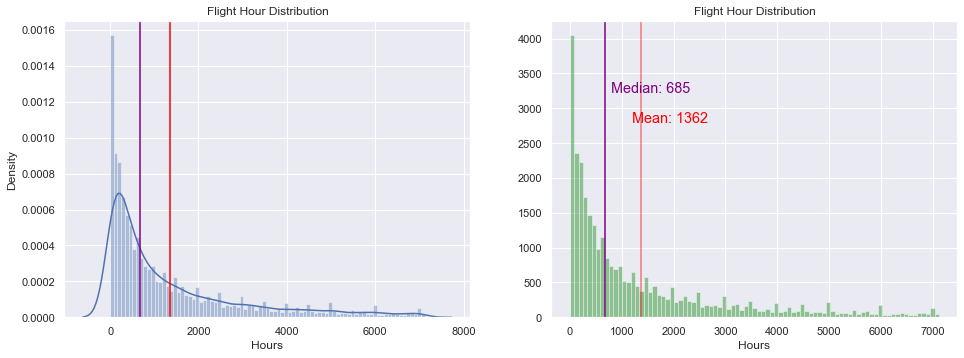

In [54]:
total_time_u = int(df['ALL-TOTL'].mean())
total_time_pm = int(df['ALL-TOTL'].median())

sns.set(rc={"figure.figsize": (16, 12)})
plt.title('Total Flight Hour Distribution')
subplot(2,2,1)
ax = sns.distplot(df['ALL-TOTL'], bins=85, axlabel="Hours")
plt.axvline(total_time_u, color='red')
plt.axvline(total_time_pm, color='purple')
plt.title('Flight Hour Distribution')

subplot(2,2,2)
ax = sns.distplot(df['ALL-TOTL'], bins=85, kde=False, color='green', axlabel='Hours')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.title('Flight Hour Distribution')
plt.axvline(total_time_pm, color='purple')
plt.text(1200,2800, 'Mean: ' + str(total_time_u), size='large', color = 'red')
plt.text(800,3220, 'Median: ' + str(total_time_pm ), size='large', color='purple')
plt.show()

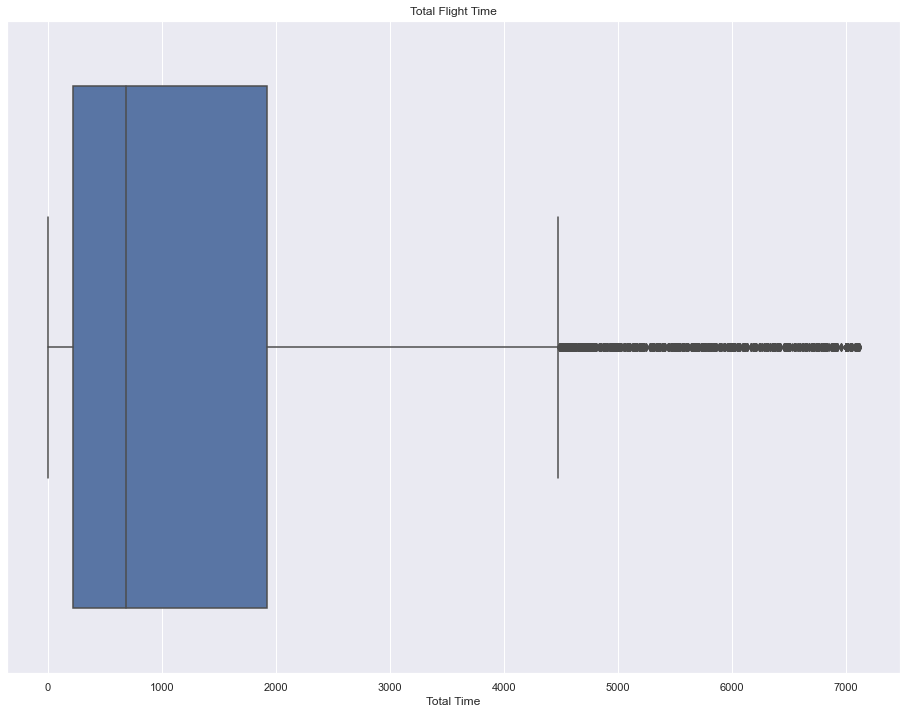

In [55]:
sns.boxplot(x=df['ALL-TOTL'])
plt.title('Total Flight Time')
plt.xlabel('Total Time')
plt.show()

In [56]:
events = df.event_cause.value_counts()
events.to_csv('D:\cap\capstone2\data\interim\cause_count.csv')
events

Personnel-Aircraft control                                                     4390
Enviro-Wind                                                                    1842
Enviro-Object/animal/substance                                                 1840
Aircraft oper/perf/capability-Directional control-Not attained/maintained      1768
Personnel-Incorrect Action                                                     1734
                                                                               ... 
Aircraft structures-Service doors-Inadequate inspection                           1
Aircraft oper/perf/capability-Maximum weight-Incorrect use/operation              1
Aircraft structures-Main frame (on wing)-Capability exceeded                      1
Aircraft systems-Flight compartment equipment-Incorrect service/maintenance       1
Aircraft power plant-Fuel divider-Incorrect service/maintenance                   1
Name: event_cause, Length: 1135, dtype: int64

In [57]:
top_5 = ['Personnel-Aircraft control', 'Enviro-Wind', 'Enviro-Object/animal/substance', 
       'Aircraft oper/perf/capability-Directional control-Not attained/maintained', 'Personnel-Incorrect Action']

In [58]:
df_top = df[df.event_cause.isin(top_5)]
df_top.shape

(11574, 69)

### TOTAL FLIGHT TIME

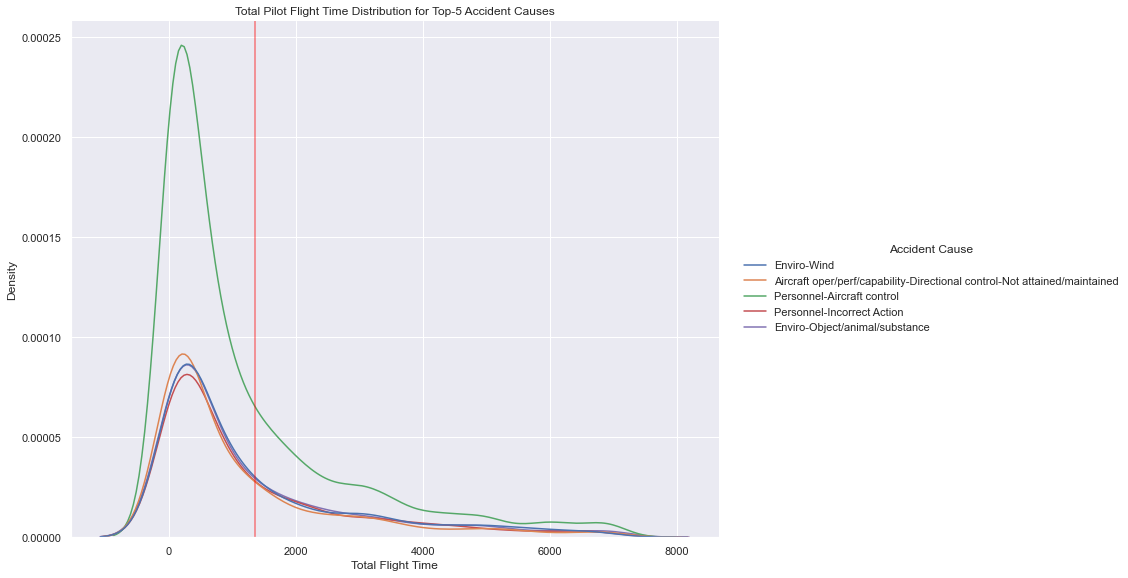

In [59]:
g = sns.displot(df_top, x='ALL-TOTL', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Total Flight Time')
plt.title('Total Pilot Flight Time Distribution for Top-5 Accident Causes')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.show()

In [60]:
u = int(df['ALL-TOTL'].mean())
print("POP MEAN: ", str(u))

m = int(df['ALL-TOTL'].median())
print("POP MEDIAN: ", str(m))

o = int(np.std(df['ALL-TOTL']))
print('POP STD: ', o)

POP MEAN:  1362
POP MEDIAN:  685
POP STD:  1616


In [61]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    if val > 70: 
        causes[k] = val

In [62]:
#causes = list(df['event_cause'].unique())
diff_means = {}
i = 0 
for c in causes:
    temp_df = df[df['event_cause'] == c]
    mean = int(temp_df['ALL-TOTL'].mean())
    median = int(temp_df['ALL-TOTL'].median())
    diff_means[i] = [c, mean, median]  
    i = i+1

In [63]:
mean_diff = pd.DataFrame.from_dict(diff_means, orient='index')
mean_diff.columns = ['cause', 'mean', 'median']
mean_diff['pop_mean'] = u
mean_diff['pop_median'] = m
mean_diff['diff_mean'] = mean_diff['mean'] - mean_diff['pop_mean']
mean_diff['diff_median'] = mean_diff['median'] - mean_diff['pop_median']

mean_diff = mean_diff [['cause', 'pop_mean', 'mean', 'diff_mean', 'pop_median', 'median', 'diff_median']]
sorted_mean = mean_diff.sort_values('diff_mean', ascending=False)
sorted_mean.head(3)


,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
23,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
37,Personnel-Installation,1362,1803,441,685,1091,406
34,Personnel-Identification/recognition,1362,1777,415,685,937,252


In [64]:
sorted_mean.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
17,Personnel-Limited Experience for Conditions,1362,689,-673,685,275,-410
15,Aircraft oper/perf/capability-Landing flare-No...,1362,671,-691,685,177,-508
27,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [65]:
sorted_median = mean_diff.sort_values('diff_median', ascending=False)
sorted_median.head(5)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
51,Enviro-Convective weather,1362,1478,116,685,1200,515
50,Aircraft systems-Gear extension and retract sy...,1362,1720,358,685,1178,493
46,Personnel-AC Modification/Repair,1362,1743,381,685,1154,469
23,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
37,Personnel-Installation,1362,1803,441,685,1091,406


In [66]:
sorted_median.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
25,Aircraft oper/perf/capability-Landing flare-In...,1362,692,-670,685,205,-480
15,Aircraft oper/perf/capability-Landing flare-No...,1362,671,-691,685,177,-508
27,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [67]:
item1 = sorted_mean.iloc[0,0]
item2 = sorted_mean.iloc[-1,0]
print(item1)
print(item2)
causer1 = df[df['event_cause']==item1]
causer2 = df[df['event_cause']==item2]

Personnel-Non-Compliace with Guidance
Personnel-Qualification/certification


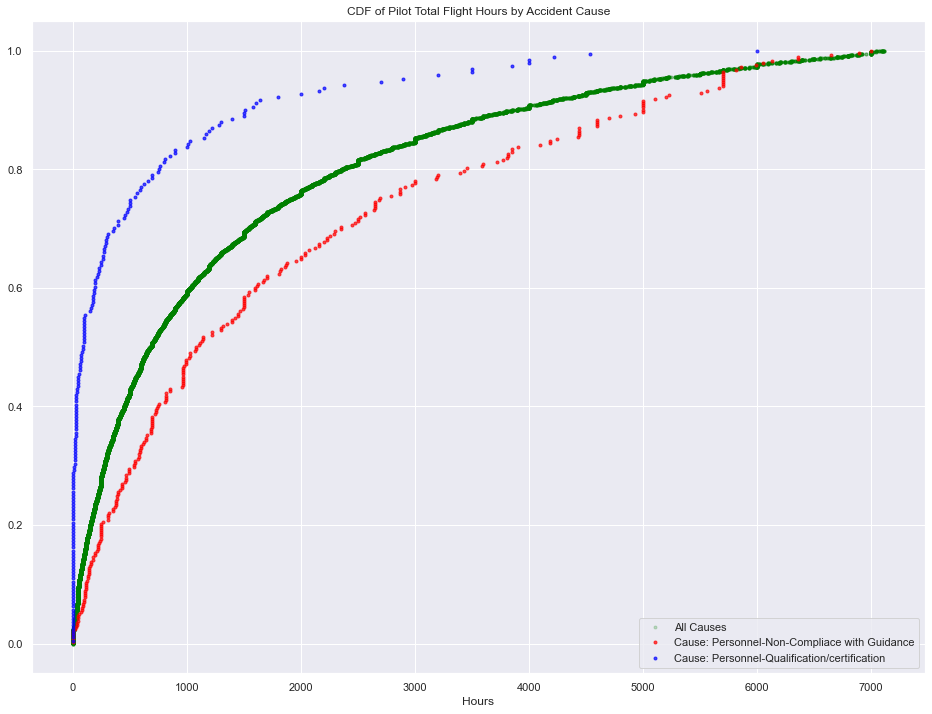

In [68]:
x_pop, y_pop = ecdf(df['ALL-TOTL'])
x_cause1, y_cause1 = ecdf(causer1['ALL-TOTL'])
x_cause2, y_cause2 = ecdf(causer2['ALL-TOTL'])
plt.plot(x_pop, y_pop, marker = '.', linestyle = 'none', color='green', alpha=0.2, label = 'All Causes')
plt.plot(x_cause1, y_cause1, marker = '.', linestyle = 'none', color='red', alpha=0.7, label = 'Cause: ' + item1)
plt.plot(x_cause2, y_cause2, marker = '.', linestyle = 'none', color='blue', alpha=0.7, label = 'Cause: ' + item2)
plt.legend(loc='lower right')
plt.title('CDF of Pilot Total Flight Hours by Accident Cause')
plt.xlabel('Hours')
plt.show()

## Hypothesis Testing

#### Null Hypothesis - There is not difference in mean total flight time between pilots involved in the top-5 accident causes  and the mean total flight time of the polulation.

#### Alternate Hypothesis - There is a difference in mean total flight time between pilots involved in the top-5 accident causes  and the mean total flight time of the polulation.

In [69]:
seed(42)
pop_hours = norm.rvs(u, o, size=50000)

### CREW AGE

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crew Age Distribution')

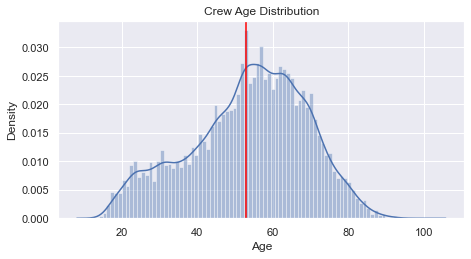

In [70]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')


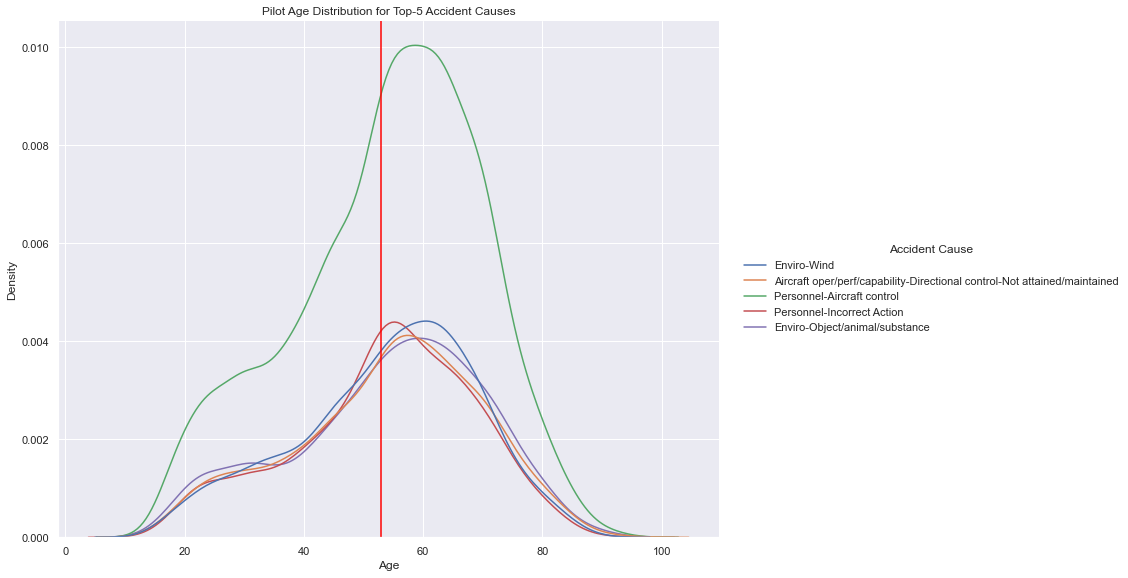

In [71]:
g = sns.displot(df_top, x='crew_age', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Age')
plt.title('Pilot Age Distribution for Top-5 Accident Causes')
plt.axvline(age_u , color='red')
plt.show()

## Hypothesis Testing

#### Null Hypothesis - There is not difference in mean age for pilots involved in the top-5 accident causes and the mean age of pilot involved in any accident.

#### Alternate Hypothesis - There is a difference in mean age for pilots involved in the top-5 accident causes and the mean age of pilot involved in any accident.

In [72]:
print('Population Mean Age = ', str(age_u))
o = np.std(df.crew_age)

print('Population Age STD = ', str(round(o,2)) )

Population Mean Age =  53
Population Age STD =  15.35


In [73]:
x = df_top.crew_age.mean()
s = np.std(df_top.crew_age, ddof=1 )

print('Sample Mean Age = ', str(x))
print('Sample Age STD = ', str(round(o,2)) )

Sample Mean Age =  53.97148781752203
Sample Age STD =  15.35


In [74]:
M = df.crew_age.median()
print('Population Median Age = ', str(M))
o = np.std(df.crew_age)

print('Population Age STD = ', str(round(o,2)) )

Population Median Age =  55.0
Population Age STD =  15.35


In [75]:
m = df_top.crew_age.median()
s = np.std(df_top.crew_age, ddof=1 )

print('Sample Median Age = ', str(x))
print('Sample Age STD = ', str(round(o,2)) )

Sample Median Age =  53.97148781752203
Sample Age STD =  15.35


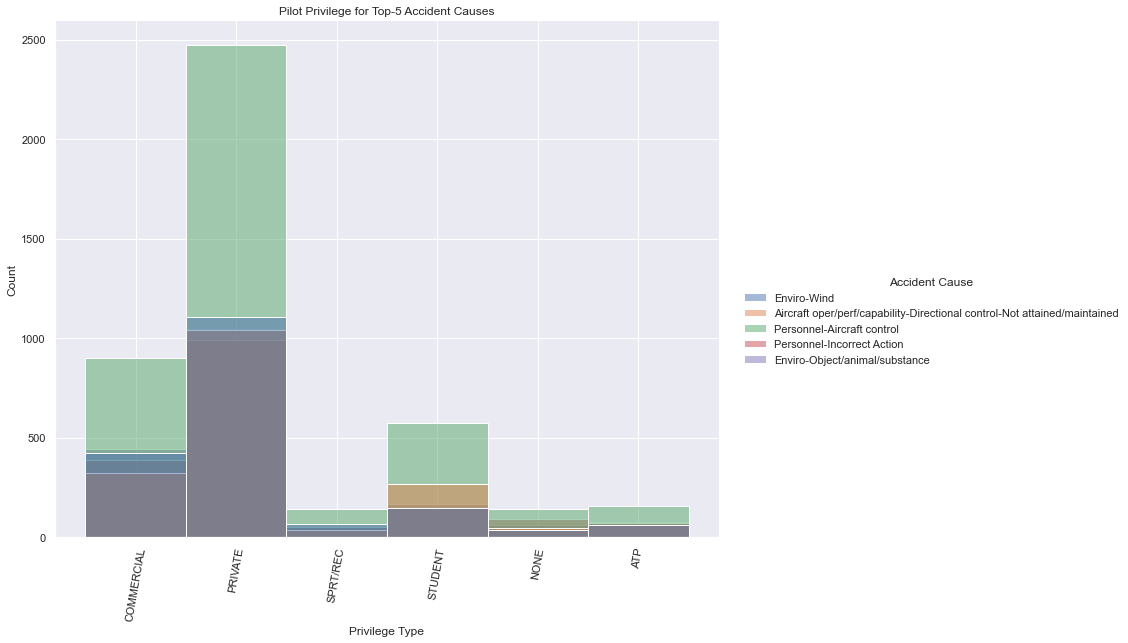

In [76]:
g = sns.displot(df_top, x='pilot_privileges',  hue='event_cause', height=8, aspect = 1.3)

g._legend.set_title('Accident Cause')
plt.xlabel('Privilege Type')
plt.title('Pilot Privilege for Top-5 Accident Causes')
g.set_xticklabels(rotation=80)
plt.show()

## Hypothesis Testing

#### Null Hypothesis - There is not difference in accident rates for the top-5 accident causes between pilots with a commercial privilege vs pilots with a private privilege.

#### Alternate Hypothesis - There is a difference in accident rates for the top-5 accident causes between pilots with a commercial privilege vs pilots with a private privilege.

In [77]:
df_top.head(3)

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
5,Enviro-Wind,91,PILOT,54,F,CL3,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,42.0,42.0,10.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,2.0,4.0,16.0,260.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,85.0
6,Aircraft oper/perf/capability-Directional cont...,91,PILOT,54,F,CL3,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,42.0,42.0,10.0,0.0,2.0,4.0,16.0,870.0,1000.0,0.0,0.0,2.0,4.0,16.0,260.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,53.0,0.0,0.0,2.0,4.0,16.0,870.0,1000.0,85.0
14,Personnel-Aircraft control,91,PILOT,31,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,107.0,172.0,0.0,0.0,0.0,0.0,3.0,89.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,172.0,0.0


In [78]:
com = df_top.pilot_privileges.isin(['COMMERCIAL']).sum()
print ('Commercial total = ', str(com))

pri = df_top.pilot_privileges.isin(['PRIVATE']).sum()
print ('Private total = ', str(pri))

print ('Total Combined = ', str (com + pri))

Commercial total =  2471
Private total =  6654
Total Combined =  9125
